### Inventory data analysis

In [1]:
# load important labiraries

import numpy as np # linear algebra
import pandas as pd # data processing 
import seaborn as sns
import matplotlib.pyplot as plt 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
 

### Data collection

In [2]:
purches = pd.read_csv('InvoicePurchases12312016.csv')
InvFinal = pd.read_csv('EndInvFINAL12312016.csv')
sales = pd.read_csv('SalesFINAL12312016.csv')
BegInv = pd.read_csv('BegInvFINAL12312016.csv')
PurchasePrice = pd.read_csv('2017PurchasePricesDec.csv')
PurchasesFinal = pd.read_csv('PurchasesFINAL12312016.csv')
purches.head(5)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,None


In [3]:
InvFinal.head(5)

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [4]:
sales.head(5)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [5]:
BegInv.head(5)

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [6]:
PurchasePrice.head(5)

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [7]:
PurchasesFinal.head(5)

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [8]:
purches.head(5)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,None


### Exploratory Data Analysis (EDA)

#### Invoice Purchases

In [9]:
purches.isnull().sum()

VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
dtype: int64

In [10]:
purches.shape

(5543, 10)

In [11]:
purches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      5543 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [12]:
purches['InvoiceDate'] = pd.to_datetime(purches['InvoiceDate'])

In [13]:
purches['Total Amount'] = purches['Dollars'] + purches['Freight']

In [14]:
purches.head(2)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,Total Amount
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None,217.73
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None,149.12


In [15]:
purches['Approval'].unique()

array(['None', 'Frank Delahunt'], dtype=object)

In [16]:
drop = ['VendorNumber','PONumber','PODate']
purches.drop(drop, axis = 1, inplace =True)

In [17]:
High_purchases_item =purches.loc[purches['Quantity'].idxmax(), 'VendorName']
Quty = purches['Quantity'].max()
print("High Prchuse Vendor Name:- ",High_purchases_item,"Quantity :-", Quty)

High Prchuse Vendor Name:-  DIAGEO NORTH AMERICA INC    Quantity :- 141660


In [18]:
total_num_of_invoice = purches[purches['VendorName'] == 'DIAGEO NORTH AMERICA INC   '].shape[0]
print('Total Number Of Invoice:-',total_num_of_invoice)
Spend_Total_Amount =purches.loc[purches['VendorName'] == 'DIAGEO NORTH AMERICA INC   ','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount)

Total Number Of Invoice:- 55
Spend Total Amount:- 51216828.92


In [19]:
Low_purchases_item =purches.loc[purches['Quantity'].idxmin(), 'VendorName']
Quty2 = purches['Quantity'].min()
print("Low Prchuse Vendor Name:- ",Low_purchases_item,"Quantity :-", Quty2)

Low Prchuse Vendor Name:-  HOOD RIVER DISTILLERS, Inc. Quantity :- 1


In [20]:
Spend_Total_Amount =purches.loc[purches['VendorName'] == 'HOOD RIVER DISTILLERS, Inc.','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount)

Spend Total Amount:- 24153.480000000003


### Sales FINAL

In [21]:
sales.head(5)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [22]:
drop1 = ['InventoryId','VendorNo','Brand',]
sales.drop(drop1,axis=1,inplace=True)

In [23]:
sales

,Store,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorName
0,1,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,JIM BEAM BRANDS COMPANY
1,1,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,JIM BEAM BRANDS COMPANY
2,1,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,JIM BEAM BRANDS COMPANY
3,1,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,JIM BEAM BRANDS COMPANY
4,1,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...
1048570,19,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2/12/2016,750,2,0.45,SOUTHERN WINE & SPIRITS NE
1048571,19,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2/13/2016,750,2,0.90,SOUTHERN WINE & SPIRITS NE
1048572,19,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2/19/2016,750,2,0.11,SOUTHERN WINE & SPIRITS NE
1048573,19,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2/22/2016,750,2,0.34,SOUTHERN WINE & SPIRITS NE


In [24]:
sales['Total Amount'] = sales['SalesDollars'] + sales['ExciseTax']

In [25]:
High_sales_item =sales.loc[sales['SalesQuantity'].idxmax(), 'VendorName']
Quty3 = sales['SalesQuantity'].max()
print("High sales Vendor Name:- ",High_sales_item,"Quantity :-", Quty3)

High sales Vendor Name:-  E & J GALLO WINERY          Quantity :- 432


In [26]:
total_num_of_invoice3 = sales[sales['VendorName'] == 'E & J GALLO WINERY         '].shape[0]
print('Total Number Of Invoice:-',total_num_of_invoice3)
Spend_Total_Amount3 =sales.loc[sales['VendorName'] == 'E & J GALLO WINERY         ','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount3)

Total Number Of Invoice:- 65240
Spend Total Amount:- 1575923.91


In [27]:
Low_sales_item =sales.loc[sales['SalesQuantity'].idxmin(), 'VendorName']
Quty4 = sales['SalesQuantity'].min()
print("Low sales Vendor Name:- ",Low_sales_item,"Quantity :-", Quty4)

Low sales Vendor Name:-  JIM BEAM BRANDS COMPANY     Quantity :- 1


In [28]:
Spend_Total_Amount4 =sales.loc[sales['VendorName'] == 'JIM BEAM BRANDS COMPANY    ','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount4)

Spend Total Amount:- 2703876.6599999997


In [29]:
sales['Description'].unique()

array(['Jim Beam w/2 Rocks Glasses', "Maker's Mark Combo Pack",
       'F Coppola Dmd Ivry Cab Svgn', ..., 'Anarkos Puglia',
       'Bols Creme De Noyaux', 'Austin Hope 10 Syrah'], dtype=object)

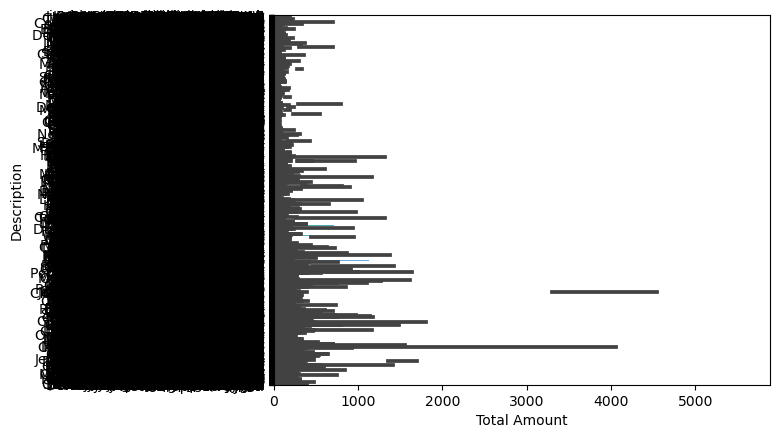

<Figure size 2800x3800 with 0 Axes>

In [35]:
sns.barplot(x='Total Amount', y='Description', data=sales)
 